<a href="https://colab.research.google.com/github/abhijeetraj22/TSF-GRIP_Tasks/blob/main/TSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP The Sparks Foundation(TSF)

##Task-1 Prediction using Supervised ML

#####In this task, I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
#####This is a simple linear regression task as it involves just two variables.

##Steps -
 - Step 1 - Importing the Library & Dataset
 - Step 2 - Visualizing the dataset
 - Step 3 - Data Preprocessing
 - Step 4 - Training the algorithm
 - Step 5 - Visualizing the model
 - Step 6 - Making Predictions
 - Step 7 - Evaluating the model

####Created by - Abhijeet Raj Modanwal


##STEP 1 - Importing the Library & Dataset

In this step, we will import the Library & Dataset through the link with the help of pandas library and then we will observe the data


In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
st_df = pd.read_csv(url)

In [ ]:
#Now let's observe the dataset
st_df.head(10)

In [ ]:
#To find the number of column
st_df.shape

In [ ]:
#To find the information about our dataset
st_df.info()

In [ ]:
st_df.describe()

In [ ]:
#Now we will check, whether the dataset contains any null or missing value
st_df.isnull().sum()

As we can see that,we don't have any null values in our dataset so, we can now visualize our Data.

##STEP 2 - Visualizing the dataset
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [ ]:
# Plotting the distribution of scores
st_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
#determine the correlation between the variable
df.corr()

**From the graph above grape, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. We can say that the increase of Hours studied(x), will also is an increase in the scores obtained(y).**

**So, we can use the linear regression supervised machine model on it to predict further values.**

##STEP 3 - Data Preprocessing

In this step we will devide the data into "attributes" (inputs) and "labels" (outputs). 

After that, we will split the whole dataset into two parts - testing data and training data.

In [ ]:
X = st_df.iloc[:, :-1].values  
y = st_df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

###STEP 4 - Training the algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


###STEP 5 - Visualizing the model
After training the model, now its time to visualize it.

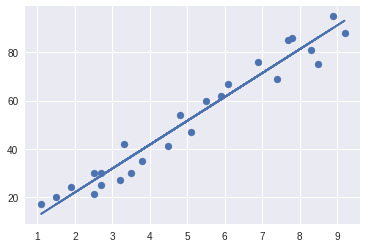

In [ ]:
line = model.coef_* x + model.intercept_

# Plotting for the training data

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train, y_train, color="red")
plt.plot(x, line, color="green");
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

In [ ]:
# Plotting for testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test, y_test, color="red")
plt.plot(x, line, color="green");
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()


### STEP 6 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(hours)
print("The predicted score, if a person studies for",hours,"hours is",own_pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737539


Hence, it can be concluded, that the predicted score if a person studies for 9.25 hours is 93.69173248737538.

### STEP 7 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
